In [1]:
import numpy as np, curvedsky as cs, sys, plottools as pl, local, tools_cmb, tqdm
from matplotlib.pyplot import *

In [20]:
def aps_read(qids,wind='com16',ivar='noivar'):
    aobj = {q: local.init_analysis_params(qid=q,wind=wind,ivar=ivar,ascale=1.0) for q in qids}
    mcl  = {q: (np.loadtxt(aobj[q].fscl['c'])).T[1] for q in qids}
    ncl  = {q: (np.loadtxt(aobj[q].fscl['n'])).T[1] for q in qids}
    return aobj, mcl, ncl

In [10]:
def SNR(L,ckk,nkk,Lmin=40,Lmax=2048,fsky=0.02,R=1.187):
    snr = np.sqrt( fsky/R**2 * np.sum( (L[Lmin:Lmax+1]+.5)*ckk[Lmin:Lmax+1]**2/(ckk+nkk)[Lmin:Lmax+1]**2 ) )
    print(snr)
    return snr

In [11]:
def comb_Nl(qids,mcl,ncl,cTT):
    Nl = 0.
    for q in qids:
        flT = (mcl[q]-ncl[q])/cTT
        flT = 1.
        Nl += flT/ncl[q]
    Nl = 1./Nl
    return Nl

In [31]:
qids_d = ['boss_d01','boss_d02','boss_d03','boss_d04','s16_d01','s16_d02','s16_d03']
qids_n = local.boss_n
qids_d_sub = local.boss_d
qids_d_s16 = local.s_16_d
qids_n_sub = local.boss_dn
qids_t = local.qid_all

In [33]:
aobj, mcl, ncl = aps_read(qids_t,wind='com16',ivar='noivar')
#aobj, mcl, ncl = aps_read(qids_t,wtype='iso15v3pt')
cTT = aobj[qids_t[0]].lcl[0,:]
cTE = aobj[qids_t[0]].lcl[3,:]
cEE = aobj[qids_t[0]].lcl[1,:]
lcl = aobj[qids_t[0]].lcl[:4,:]

In [35]:
Ncl = {}
for qid in qids_t:
    Ncl[qid] = comb_Nl([qid],mcl,ncl,cTT)
Ncl['d'] = comb_Nl(qids_d,mcl,ncl,cTT)
Ncl['n'] = comb_Nl(qids_n,mcl,ncl,cTT)
Ncl['dboss'] = comb_Nl(qids_d_sub,mcl,ncl,cTT)
Ncl['ds16'] = comb_Nl(qids_d_s16,mcl,ncl,cTT)
Ncl['dnboss'] = comb_Nl(qids_n_sub,mcl,ncl,cTT)
Ncl['all'] = 1./(1./Ncl['d']+1./Ncl['n'])

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [36]:
#comb = ['d','n','dboss','ds16','dnboss','all']
comb = local.qid_all

In [37]:
ocl = {}
for c in comb:
    ocl[c] = lcl.copy()
    ocl[c][0,:] += Ncl[c]
    ocl[c][1,:] += 2*Ncl[c]
    ocl[c][2,:] += 2*Ncl[c]

In [38]:
Lmax = 2048
rlmax = 3000
L = np.linspace(0,Lmax,Lmax+1)
ckk = aobj[qids_t[0]].ckk[:Lmax+1]
rlmin = 500

In [ ]:
Ag = {}
for c in comb:
    print(c)
    QDO = [True,True,True,True,True,False]
    Ag['MV',c], __, __, __ = cs.norm_quad.qall('lens',QDO,Lmax,rlmin,rlmax,lcl[:,:rlmax+1],ocl[c][:,:rlmax+1],lfac='k')

boss_d01
boss_d03
boss_d04
s16_d01
s16_d02
s16_d03
boss_01
boss_02


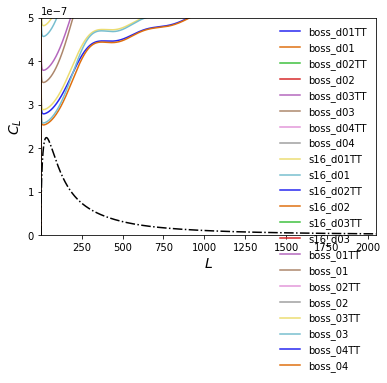

In [42]:
pl.plot_1dstyle(xmin=1,xmax=Lmax,ymin=0,ymax=5e-7)
for c in comb:
    plot(L,Ag['MV',c][0,:],label=c+'TT')
    plot(L,Ag['MV',c][5,:],label=c)
plot(L,ckk,color='k',ls='-.')
legend()

In [43]:
for q in [0,5]:
    for c in comb:
        print(q,c)
        SNR(L,ckk,Ag['MV',c][q])
        #SNR(L,ckk,Ag['MV',c][q],Lmin=50)
        #SNR(L,ckk,Ag['MV',c][q],Lmin=50,Lmax=1000)

0 boss_d01
0.607973166525634
0 boss_d02
1.1439567967868205
0 boss_d03
5.459025966676536
0 boss_d04
1.1373614228810767
0 s16_d01
4.612334663429796
0 s16_d02
7.118283699909813
0 s16_d03
2.452635578752342
0 boss_01
1.0913359357767467
0 boss_02
2.2743552225237886
0 boss_03
6.841846429363206
0 boss_04
1.8345408609166416
5 boss_d01
0.6200057903333918
5 boss_d02
1.1633575143129955
5 boss_d03
5.603963437358414
5 boss_d04
1.1584349834859775
5 s16_d01
4.701063952820815
5 s16_d02
7.318636431094065
5 s16_d03
2.5020083368550283
5 boss_01
1.1147384958945947
5 boss_02
2.3191606936752915
5 boss_03
7.074972082758416
5 boss_04
1.873698350988517


In [13]:
rlmins = np.arange(1000,400,-100)
SN_d = np.zeros(len(rlmins))
SN_n = np.zeros(len(rlmins))
SN_t = np.zeros(len(rlmins))
for i, rlmin in enumerate(rlmins):
    Ag = {}
    for q in tqdm.tqdm(qids_t):
        Ag[q], __ = cs.norm_quad.qtt('lens',Lmax,rlmin,rlmax,cTT[:rlmax+1],(cTT+ncl[q])[:rlmax+1],lfac='k')
    Ag_d, __ = cs.norm_quad.qtt('lens',Lmax,rlmin,rlmax,cTT[:rlmax+1],ocl['d'][0,:rlmax+1],lfac='k')
    Ag_n, __ = cs.norm_quad.qtt('lens',Lmax,rlmin,rlmax,cTT[:rlmax+1],ocl['n'][0,:rlmax+1],lfac='k')
    Ag_t, __ = cs.norm_quad.qtt('lens',Lmax,rlmin,rlmax,cTT[:rlmax+1],ocl['dn'][0,:rlmax+1],lfac='k')
    SN_d[i] = SNR(L,ckk,Ag_d)
    SN_n[i] = SNR(L,ckk,Ag_n)
    SN_t[i] = SNR(L,ckk,Ag_t)

100%|██████████| 11/11 [00:25<00:00,  2.30s/it]


KeyError: 'dn'

In [ ]:
pl.plot_1dstyle(xmin=500,xmax=1000,ymin=0,ymax=25,xlab='lmin',ylab='SN')
plot(rlmins,SN_d)

In [ ]:
pl.plot_1dstyle(ylog=True,xmin=1,xmax=Lmax,ymin=1e-8,ymax=1e-5)
for q in qids_d:
    plot(L,Ag[q],label=local.qid_label(q))
plot(L,Ag_d,'-',label='total',color='k')
plot(L,ckk,color='k',ls='-.')
legend()

In [ ]:
pl.plot_1dstyle(ylog=True,xmin=1,xmax=Lmax,ymin=1e-8,ymax=1e-5)
for q in qids_n:
    plot(L,Ag[q],label=local.qid_label(q))
plot(L,Ag_n,'-',label='total',color='k')
plot(L,ckk,color='k',ls='-.')
legend()

In [ ]:
pl.plot_1dstyle(ylog=False,xmin=1,xmax=Lmax,ymin=0.,ymax=5e-7)
plot(L,Ag_d,'-',label='day (SN='+str(np.round(SN_d[-1],1))+')')
plot(L,Ag_n,'--',label='night (SN='+str(np.round(SN_n[-1],1))+')')
plot(L,Ag_t,'-',label='day+night (SN='+str(np.round(SN_t[-1],1))+')')
plot(L,ckk,color='k',ls='-.')
legend()